In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train = pd.read_csv('train.csv')

In [3]:
print(train.isnull().any().describe())

count       785
unique        1
top       False
freq        785
dtype: object


In [4]:
train_rows = train.shape[0]

In [5]:
train = train.iloc[:20000, :]

In [6]:
train.shape

(20000, 785)

In [7]:
dfsize = train.shape[0]//100
end = dfsize
start = 0
print(dfsize)

200


In [8]:
train_dfs = [None]*100
for i in range(100):
    train_dfs[i] = train.iloc[start:end, :]
    start += dfsize
    end += dfsize

In [9]:
train_dfs[1].shape

(200, 785)

In [10]:
'''
n1 = len(train1)
n2 = len(train2)
n3 = len(train3)
n4 = len(train4)
'''

'\nn1 = len(train1)\nn2 = len(train2)\nn3 = len(train3)\nn4 = len(train4)\n'

In [11]:
'''
df = pd.Series(data=[n1, n2, n3, n4],
               index=['Set1', 'Set2', 'Set3', 'Set4'],
               name="DATA").rename_axis("Data set length", axis=0)

x = df.index
y = df.values

plt.bar(x, y)
'''

'\ndf = pd.Series(data=[n1, n2, n3, n4],\n               index=[\'Set1\', \'Set2\', \'Set3\', \'Set4\'],\n               name="DATA").rename_axis("Data set length", axis=0)\n\nx = df.index\ny = df.values\n\nplt.bar(x, y)\n'

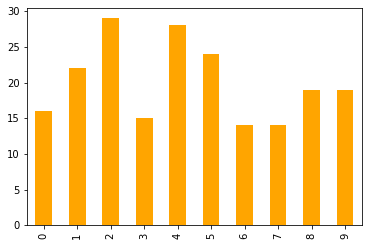

In [12]:
train_dfs[2]['label'].value_counts().sort_index(axis=0).plot.bar(color='orange')

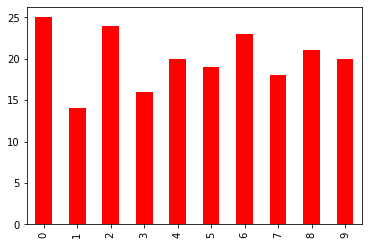

In [13]:
train_dfs[20]['label'].value_counts().sort_index(axis=0).plot.bar(color='red')

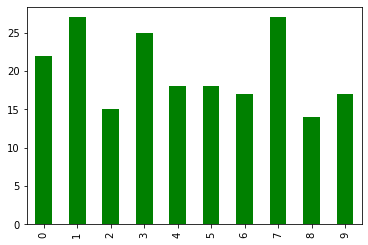

In [14]:
train_dfs[43]['label'].value_counts().sort_index(axis=0).plot.bar(color='green')

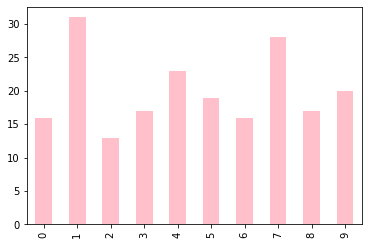

In [15]:
train_dfs[67]['label'].value_counts().sort_index(axis=0).plot.bar(color='pink')

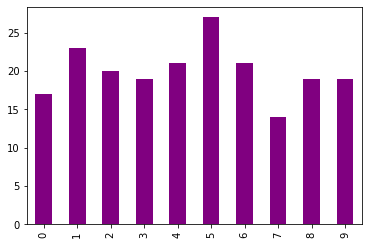

In [16]:
train_dfs[79]['label'].value_counts().sort_index(axis=0).plot.bar(color='purple')

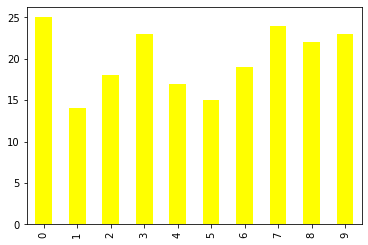

In [17]:
train_dfs[94]['label'].value_counts().sort_index(axis=0).plot.bar(color='yellow')

In [18]:
X = [None]*100
y = [None]*100
for i in range(100):
    X[i] = train_dfs[i].drop(labels=['label'],axis=1)
    y[i] = train_dfs[i]['label']
del train_dfs

In [19]:
# normalizing
for i in range(100):
    X[i] = X[i]/255.0

In [20]:
# reshaping images in 3 dimensions (height=28px, width=28px, canal=1)
for i in range(100):
    X[i] = X[i].values.reshape(-1,28,28,1)

In [21]:
x_train, x_test, y_train, y_test = [None]*100, [None]*100, [None]*100, [None]*100

In [22]:
from sklearn.model_selection import train_test_split
random_seed = 2
for i in range(100):
    x_train[i], x_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i], test_size=0.1, random_state=random_seed)

In [23]:
print(type(x_test[5]))
print(x_test[5].shape)
print(x_train[5].shape)

<class 'numpy.ndarray'>
(20, 28, 28, 1)
(180, 28, 28, 1)


In [24]:
test_X = np.append(x_test[0], x_test[1], axis=0)
test_y = np.append(y_test[0], y_test[1], axis=0)

for i in range(3, 100):
    test_X = np.append(test_X, x_test[i], axis=0)
    test_y = np.append(test_y, y_test[i], axis=0)

In [25]:
def MODEL():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ])
    #model.summary()
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])
    return model

In [26]:
#predictions = model(x_train1[:1]).numpy()
#predictions

In [27]:
# Convert the logits into probabilities
#tf.nn.softmax(predictions).numpy()

In [28]:
#loss_fn(y_train1[:1], predictions).numpy()

In [29]:
#history = model.fit(x_train2, y_train2, validation_split=0.1, epochs=15)

In [30]:
#print(history.history.keys())

In [31]:
'''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''

"\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()\n"

In [32]:
#model.evaluate(x_test1,  y_test1, verbose=2)

In [33]:
#predictions = model.predict(test1)

In [34]:
#print(type(predictions))
#print(predictions.shape)

In [35]:
#model.get_weights()

In [36]:
#model.fit(x_train2, y_train2, validation_split=0.1, epochs=2, verbose=0)

In [37]:
models = [None]*100
for i in range(100):
    models[i] = MODEL()

In [38]:
models[1].evaluate(x_test[1],  y_test[1], verbose=2)

1/1 - 3s - loss: 2.3758 - accuracy: 0.1000


[2.3758275508880615, 0.10000000149011612]

In [39]:
models[12].evaluate(x_test[12],  y_test[12], verbose=2)

1/1 - 0s - loss: 2.2973 - accuracy: 0.2500


[2.297259569168091, 0.25]

In [40]:
models[97].evaluate(x_test[97],  y_test[97], verbose=2)

1/1 - 0s - loss: 2.3053 - accuracy: 0.1500


[2.3053345680236816, 0.15000000596046448]

In [41]:
np.random.seed(2)

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
models = [None]*100
for i in range(100):
    models[i] = MODEL()

H = [None]*100
W = [None]*100

for i in range(100):
    for j in range(100):
        H[j] = models[j].fit(x_train[j], y_train[j], validation_split=0.1, epochs=1, verbose=0)
        wt = models[j].get_weights()
        W[j] = np.array(wt)
        
    sum = W[0]
    for j in range(1,100):
        sum += W[j]
        
    mean = sum/100
    
    for j in range(100):
        models[j].set_weights(mean)
        
for j in range(100):
    models[i].evaluate(x_train[i],  y_train[i], verbose=2)

6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - loss: 0.4487 - accuracy: 0.8444
6/6 - 0s - 

In [44]:
models[0].evaluate(test_X,  test_y, verbose=2)

62/62 - 0s - loss: 0.3574 - accuracy: 0.9076


[0.3574298322200775, 0.907575786113739]

In [45]:
models = [None]*100
for i in range(100):
    models[i] = MODEL()

H = [None]*100
W = [None]*100

for i in range(50):
    for j in range(100):
        H[j] = models[j].fit(x_train[j], y_train[j], validation_split=0.1, epochs=1, verbose=0)
        wt = models[j].get_weights()
        W[j] = np.array(wt)
        
    sum = W[0]
    for j in range(1,100):
        sum += W[j]
        
    mean = sum/100
    
    for j in range(100):
        models[j].set_weights(mean)
        
for j in range(100):
    models[i].evaluate(x_train[i],  y_train[i], verbose=2)

6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - 

6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - loss: 0.5083 - accuracy: 0.8944
6/6 - 0s - 

In [47]:
models[0].evaluate(test_X,  test_y, verbose=2)

62/62 - 0s - loss: 0.5151 - accuracy: 0.8682


[0.515055239200592, 0.8681818246841431]

In [48]:
models = [None]*100
for i in range(100):
    models[i] = MODEL()

H = [None]*100
W = [None]*100

for i in range(80):
    for j in range(100):
        H[j] = models[j].fit(x_train[j], y_train[j], validation_split=0.1, epochs=1, verbose=0)
        wt = models[j].get_weights()
        W[j] = np.array(wt)
        
    sum = W[0]
    for j in range(1,100):
        sum += W[j]
        
    mean = sum/100
    
    for j in range(100):
        models[j].set_weights(mean)
        
for j in range(100):
    models[i].evaluate(x_train[i],  y_train[i], verbose=2)

6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - 

6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - loss: 0.4416 - accuracy: 0.8778
6/6 - 0s - 

In [49]:
models[0].evaluate(test_X,  test_y, verbose=2)

62/62 - 0s - loss: 0.3961 - accuracy: 0.9020


[0.3960976302623749, 0.9020202159881592]

In [ ]:
print(h1.history['accuracy'])
print(h1.history['val_accuracy'])
print(h2.history['accuracy'])
print(h2.history['val_accuracy'])
print(h3.history['accuracy'])
print(h3.history['val_accuracy'])
print(h4.history['accuracy'])
print(h4.history['val_accuracy'])